In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [3]:
# read in csv
df = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')
pd.options.display.max_columns = 999
df = df.reindex(sorted(df.columns), axis=1)
df_test = df_test.reindex(sorted(df_test.columns), axis=1)

#df.head()

In [4]:
#check for objects only
df.select_dtypes(include=['object']).dtypes

Alley             object
Bldg Type         object
Bsmt Cond         object
Bsmt Exposure     object
Bsmt Qual         object
BsmtFin Type 1    object
BsmtFin Type 2    object
Central Air       object
Condition 1       object
Condition 2       object
Electrical        object
Exter Cond        object
Exter Qual        object
Exterior 1st      object
Exterior 2nd      object
Fence             object
Fireplace Qu      object
Foundation        object
Functional        object
Garage Cond       object
Garage Finish     object
Garage Qual       object
Garage Type       object
Heating           object
Heating QC        object
House Style       object
Kitchen Qual      object
Land Contour      object
Land Slope        object
Lot Config        object
Lot Shape         object
MS Zoning         object
Mas Vnr Type      object
Misc Feature      object
Neighborhood      object
Paved Drive       object
Pool QC           object
Roof Matl         object
Roof Style        object
Sale Type         object


In [5]:
#check for null
df['Kitchen Qual'].isnull().sum()

0

In [6]:
df['Kitchen Qual'].value_counts()

TA    1047
Gd     806
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64

In [7]:
# If column is Nominal, do this:
# pd.get_dummies()

# If column is Ordinal, do this:
df['Kitchen Qual Num'] = df['Kitchen Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1})

In [8]:
df['year_remod_or_built'] = df['Year Remod/Add'] * df['Year Built']

In [9]:
#create variable for Neighborhood with dummies
df = pd.get_dummies(df, columns = ['Neighborhood'], drop_first=True)
neigh_dum = [col for col in df.columns if 'Neighborhood' in col]

In [10]:
#found two # replicate all above for the test set
df_test['Kitchen Qual Num'] = df_test['Kitchen Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df_test['year_remod_or_built'] = df_test['Year Remod/Add'] * df_test['Year Built']
df_test = pd.get_dummies(df_test, columns=['Neighborhood'], drop_first=True)

neigh_dum_test = [col for col in df_test.columns if 'Neighborhood' in col]
diff_neigh = list(set(neigh_dum) - set(neigh_dum_test))
df_test[diff_neigh[0]] = 0
df_test[diff_neigh[1]] = 0

In [11]:
features = ['Kitchen Qual Num', 'year_remod_or_built', 'Overall Qual']
features.extend(neigh_dum)
X = df[features]
y = df['SalePrice']

#instantiate
lr = LinearRegression()

cross_val_score(lr,X,y).mean()

0.7434945340550307

In [12]:
# train test split
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=33)

# fit the model
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
#train score
lr.score(X_train, y_train)

0.7695214976557637

In [14]:
#test score
lr.score(X_val, y_val)

0.6918917412927973

In [15]:
#this was a test, if doing in earnest, would have stopped above
cross_val_score(lr,X_train,y_train).mean()

0.7563740160750366

 ASSESS:
 - train score = 76.9
 - test score = 69.2
 - cross_val score = 75.6
 looks like some variance, lowish bias 

In [16]:
# make predictions
pred = lr.predict(X)
#pred

In [17]:
#residuals 
residuals = y-pred
#residuals

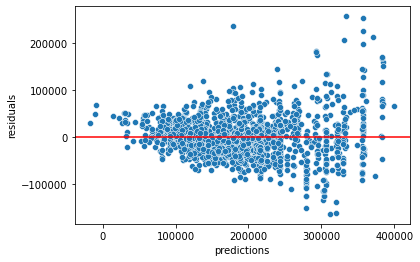

In [18]:
plt.axhline(y=0, color='r')
sns.scatterplot(x=pred, y=residuals)
('Residual Plot to Show error - Epsilon')
plt.xlabel('predictions')
plt.ylabel('residuals');

-803.5679287082536

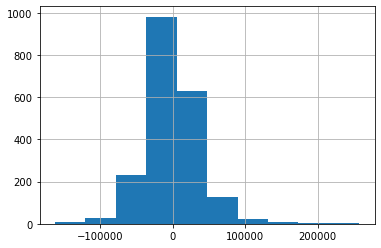

In [19]:
residuals.hist();
residuals.mean()

In [20]:
#residuals.sort_values()

In [21]:
#df_test.shape

In [22]:
#df_test[features]

In [24]:
#make preds on test
test_preds = lr.predict(df_test[features])

#create target column 'SalePrice' in df_test
df_test['SalePrice'] = test_preds

#create df for submission with only Id and SalePrice
submission = df_test[['Id', 'SalePrice']]

submission.set_index('Id', inplace=True)
submission.head()

#submission.to_csv('../datasets/Kaggle Submissions/Kitchen Qual Num,year_remod_or_built,Overall Qual.csv')

,SalePrice
Id,
2658,112296.889137
2718,133787.829449
2414,217571.162374
1989,118157.053781
625,159626.829191


# GET RMSE #

In [25]:
np.sqrt(metrics.mean_squared_error(y, pred))

39516.972593825456